In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
df= pd.read_csv("recent_crime_dataset1.csv")
df

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,250304283,2025-03-28,03/27/2025 12:00:00 AM,1250,3,Southwest,358,1,510,VEHICLE - STOLEN,...,IC,Invest Cont,510.0,NaN,NaN,NaN,3500 WATT WY,NaN,34.0223,-118.2865
1,250504258,2025-03-28,03/01/2025 12:00:00 AM,1200,5,Harbor,599,1,510,VEHICLE - STOLEN,...,IC,Invest Cont,510.0,NaN,NaN,NaN,2500 NAVY WY,NaN,33.7315,-118.2399
2,250504256,2025-03-28,03/27/2025 12:00:00 AM,1200,5,Harbor,599,1,510,VEHICLE - STOLEN,...,IC,Invest Cont,510.0,NaN,NaN,NaN,2500 NAVY WY,NaN,33.7315,-118.2399
3,250504257,2025-03-28,02/25/2025 12:00:00 AM,940,5,Harbor,529,1,510,VEHICLE - STOLEN,...,IC,Invest Cont,510.0,NaN,NaN,NaN,900 MCFARLAND AV,NaN,33.7819,-118.2527
4,250504255,2025-03-28,03/27/2025 12:00:00 AM,1200,5,Harbor,599,1,510,VEHICLE - STOLEN,...,IC,Invest Cont,510.0,NaN,NaN,NaN,2500 NAVY WY,NaN,33.7315,-118.2399
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,241713416,2024-10-08,10/08/2024 12:00:00 AM,2020,17,Devonshire,1782,1,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER),...,IC,Invest Cont,442.0,NaN,NaN,NaN,8800 CORBIN AV,NaN,34.2302,-118.5623
19996,240119663,2024-10-08,09/25/2024 12:00:00 AM,1415,1,Central,111,1,440,THEFT PLAIN - PETTY ($950 & UNDER),...,IC,Invest Cont,440.0,NaN,NaN,NaN,100 PASEO DE LA PLAZA,NaN,34.0615,-118.2412
19997,241713426,2024-10-08,10/08/2024 12:00:00 AM,1215,17,Devonshire,1762,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,9700 DELCO AV,NaN,34.2467,-118.5787
19998,240711874,2024-10-08,10/07/2024 12:00:00 AM,2050,7,Wilshire,784,1,331,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,...,IC,Invest Cont,331.0,NaN,NaN,NaN,2200 S REDONDO BL,NaN,34.0379,-118.3542


In [2]:
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,250304283,2025-03-28,03/27/2025 12:00:00 AM,1250,3,Southwest,358,1,510,VEHICLE - STOLEN,...,IC,Invest Cont,510.0,NaN,NaN,NaN,3500 WATT WY,NaN,34.0223,-118.2865
1,250504258,2025-03-28,03/01/2025 12:00:00 AM,1200,5,Harbor,599,1,510,VEHICLE - STOLEN,...,IC,Invest Cont,510.0,NaN,NaN,NaN,2500 NAVY WY,NaN,33.7315,-118.2399
2,250504256,2025-03-28,03/27/2025 12:00:00 AM,1200,5,Harbor,599,1,510,VEHICLE - STOLEN,...,IC,Invest Cont,510.0,NaN,NaN,NaN,2500 NAVY WY,NaN,33.7315,-118.2399
3,250504257,2025-03-28,02/25/2025 12:00:00 AM,940,5,Harbor,529,1,510,VEHICLE - STOLEN,...,IC,Invest Cont,510.0,NaN,NaN,NaN,900 MCFARLAND AV,NaN,33.7819,-118.2527
4,250504255,2025-03-28,03/27/2025 12:00:00 AM,1200,5,Harbor,599,1,510,VEHICLE - STOLEN,...,IC,Invest Cont,510.0,NaN,NaN,NaN,2500 NAVY WY,NaN,33.7315,-118.2399


In [3]:
df.tail()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
19995,241713416,2024-10-08,10/08/2024 12:00:00 AM,2020,17,Devonshire,1782,1,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER),...,IC,Invest Cont,442.0,NaN,NaN,NaN,8800 CORBIN AV,NaN,34.2302,-118.5623
19996,240119663,2024-10-08,09/25/2024 12:00:00 AM,1415,1,Central,111,1,440,THEFT PLAIN - PETTY ($950 & UNDER),...,IC,Invest Cont,440.0,NaN,NaN,NaN,100 PASEO DE LA PLAZA,NaN,34.0615,-118.2412
19997,241713426,2024-10-08,10/08/2024 12:00:00 AM,1215,17,Devonshire,1762,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,9700 DELCO AV,NaN,34.2467,-118.5787
19998,240711874,2024-10-08,10/07/2024 12:00:00 AM,2050,7,Wilshire,784,1,331,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,...,IC,Invest Cont,331.0,NaN,NaN,NaN,2200 S REDONDO BL,NaN,34.0379,-118.3542
19999,240315223,2024-10-08,10/08/2024 12:00:00 AM,800,3,Southwest,363,2,888,TRESPASSING,...,IC,Invest Cont,888.0,NaN,NaN,NaN,4000 CRENSHAW BL,NaN,34.0120,-118.3351


In [4]:
df.shape

(20000, 28)

In [5]:
df.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON'],
      dtype='object')

In [6]:
df.dtypes

DR_NO               int64
Date Rptd          object
DATE OCC           object
TIME OCC            int64
AREA                int64
AREA NAME          object
Rpt Dist No         int64
Part 1-2            int64
Crm Cd              int64
Crm Cd Desc        object
Mocodes            object
Vict Age            int64
Vict Sex           object
Vict Descent       object
Premis Cd         float64
Premis Desc        object
Weapon Used Cd    float64
Weapon Desc        object
Status             object
Status Desc        object
Crm Cd 1          float64
Crm Cd 2          float64
Crm Cd 3          float64
Crm Cd 4          float64
LOCATION           object
Cross Street       object
LAT               float64
LON               float64
dtype: object

In [7]:
df.isna().sum()

DR_NO                 0
Date Rptd             0
DATE OCC              0
TIME OCC              0
AREA                  0
AREA NAME             0
Rpt Dist No           0
Part 1-2              0
Crm Cd                0
Crm Cd Desc           0
Mocodes            5860
Vict Age              0
Vict Sex           5749
Vict Descent       5750
Premis Cd             2
Premis Desc           2
Weapon Used Cd    19038
Weapon Desc       19038
Status                0
Status Desc           0
Crm Cd 1              0
Crm Cd 2          19774
Crm Cd 3          19996
Crm Cd 4          20000
LOCATION              0
Cross Street      17876
LAT                   0
LON                   0
dtype: int64

In [8]:
df.drop(df[['Weapon Used Cd','Weapon Desc','Crm Cd 2','Crm Cd 3','Crm Cd 4','Cross Street']],axis=1,inplace=True)
df.dropna(axis=0,inplace=True)
df.reset_index(drop=True,inplace=True)

In [9]:
# Convert dates
df['DATE OCC'] = pd.to_datetime(df['DATE OCC'], errors='coerce')
df['Date Rptd'] = pd.to_datetime(df['Date Rptd'], errors='coerce')


C:\Users\DELL\AppData\Local\Temp\ipykernel_14372\1973840735.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['DATE OCC'] = pd.to_datetime(df['DATE OCC'], errors='coerce')


In [10]:
# Time-based features
df['Hour'] = df['TIME OCC'] // 100
df['Day of Week'] = df['DATE OCC'].dt.day_name()
df['Month'] = df['DATE OCC'].dt.month
df['Is Weekend'] = df['Day of Week'].isin(['Saturday', 'Sunday']).astype(int)


In [11]:
# Part of day
#If the hour is between 5 and 11, it labels it as "Morning."

# If it's between 12 and 4, it's labeled "Afternoon."

# If it's between 5 and 8 PM, it says "Evening."

# For all other hours, it says "Night."

def get_part_of_day(hour):
    if pd.isnull(hour): return "Unknown"
    if 5 <= hour < 12: return "Morning"
    elif 12 <= hour < 17: return "Afternoon"
    elif 17 <= hour < 21: return "Evening"
    else: return "Night"
df['Part of Day'] = df['Hour'].apply(get_part_of_day)


In [12]:
# Add Report Delay feature
df['Report Delay'] = (df['Date Rptd'] - df['DATE OCC']).dt.days   # gives a timedelta (the difference between two dates).


In [13]:
# Crime severity mapping (can adjust)
#It first converts the crime description in the Crm Cd Desc column to uppercase using .str.upper().

#Then, it checks the description against a predefined dictionary (severity_map) that maps crime types to severity levels:

#'HOMICIDE', 'ROBBERY', 'RAPE', and 'VEHICLE - STOLEN' are labeled as "High" severity.

#'BATTERY' and 'BURGLARY' are labeled as "Medium" severity.

#'THEFT' and 'VANDALISM' are labeled as "Low" severity.
severity_map = {
    'HOMICIDE': 'High', 'ROBBERY': 'High', 'RAPE': 'High', 'BATTERY': 'Medium',
    'BURGLARY': 'Medium', 'THEFT': 'Low', 'VANDALISM': 'Low',
    'VEHICLE - STOLEN': 'High'
}
df['Crime Severity'] = df['Crm Cd Desc'].str.upper().map(lambda x: next((v for k, v in severity_map.items() if k in x), 'Medium'))


In [14]:
# Define binary target: Case Closed = 1 if closed
closed_statuses = ['AA', 'JA', 'JO', 'AO']  # Customize as needed
df['Case Closed'] = df['Status'].isin(closed_statuses).astype(int)


In [15]:
 # Drop irrelevant or leak-prone columns
drop_cols = ['DR_NO', 'DATE OCC', 'Date Rptd','TIME OCC','AREA NAME', 'Status','Status Desc','Rpt Dist No','Vict Age','Premis Cd','Crm Cd 1','LAT','LON','Hour','Month','Is Weekend','Report Delay']
df = df.drop(columns=drop_cols)
df


,AREA,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,Vict Sex,Vict Descent,Premis Desc,LOCATION,Day of Week,Part of Day,Crime Severity,Case Closed
0,7,1,210,ROBBERY,0344,M,H,BUS STOP,7800 MELROSE AV,Friday,Afternoon,High,0
1,4,1,210,ROBBERY,0344 0342 0400 0352,M,H,DRIVEWAY,200 S SOTO ST,Tuesday,Afternoon,High,0
2,19,2,850,INDECENT EXPOSURE,0529 2024 1815 0913,F,H,HIGH SCHOOL,11100 OMELVENY AV,Tuesday,Afternoon,Medium,0
3,12,1,210,ROBBERY,1251 1815 1824 0913 0342 0337 0444 0344 2024 1259,M,H,JUNIOR HIGH SCHOOL,5900 S VERMONT AV,Monday,Afternoon,High,0
4,19,1,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",0344 1822 1402,M,W,ELEMENTARY SCHOOL,13800 PIERCE ST,Friday,Night,Low,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14125,17,1,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER),0344 0325 0352 0378,X,X,OTHER BUSINESS,8800 CORBIN AV,Tuesday,Evening,Low,0
14126,1,1,440,THEFT PLAIN - PETTY ($950 & UNDER),0344 2032,F,H,OTHER BUSINESS,100 PASEO DE LA PLAZA,Wednesday,Afternoon,Low,0
14127,17,2,354,THEFT OF IDENTITY,0928 1822,M,W,SINGLE FAMILY DWELLING,9700 DELCO AV,Tuesday,Afternoon,Low,0
14128,7,1,331,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,1300 0385 1822,M,H,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",2200 S REDONDO BL,Monday,Evening,Low,0


In [16]:
#Fill missing values
#df['Weapon Desc'] = df['Weapon Desc'].fillna("Unknown")
df['Vict Sex'] = df['Vict Sex'].fillna("Unknown")
df['Vict Descent'] = df['Vict Descent'].fillna("Unknown")
df['Premis Desc'] = df['Premis Desc'].fillna("Unknown")
df['Mocodes'] = df['Mocodes'].fillna("None")

In [17]:
# # Encode categorical features
label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

In [18]:
# --- Modeling --- #

X = df.drop(columns=['Case Closed'])
y = df['Case Closed']


In [19]:
# Train-test split
X_train,X_test,y_train,y_test =train_test_split(X, y, test_size=0.25, random_state=42)


In [20]:
# Apply SMOTE
# smote = SMOTE(random_state=42)
# X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Train XGBoost
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model.fit(X_train, y_train)

c:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:46:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [21]:
# Predict and evaluate
y_pred = model.predict(X_test)
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))
print("\n🧮 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

✅ Accuracy: 0.9643362581375602

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      3420
           1       0.35      0.13      0.19       113

    accuracy                           0.96      3533
   macro avg       0.66      0.56      0.59      3533
weighted avg       0.95      0.96      0.96      3533


🧮 Confusion Matrix:
 [[3392   28]
 [  98   15]]


In [22]:

df.drop(df[['Weapon Used Cd','Weapon Desc','Crm Cd 2','Crm Cd 3','Crm Cd 4','Cross Street']],axis=1,inplace=True)
df.dropna(axis=0,inplace=True)
df.reset_index(drop=True,inplace=True)
# # --- Feature Engineering --- #

# Convert dates
df['DATE OCC'] = pd.to_datetime(df['DATE OCC'], errors='coerce')
df['Date Rptd'] = pd.to_datetime(df['Date Rptd'], errors='coerce')

# Time-based features
df['Hour'] = df['TIME OCC'] // 100
df['Day of Week'] = df['DATE OCC'].dt.day_name()
df['Month'] = df['DATE OCC'].dt.month
df['Is Weekend'] = df['Day of Week'].isin(['Saturday', 'Sunday']).astype(int)

# Part of day
def get_part_of_day(hour):
    if pd.isnull(hour): return "Unknown"
    if 5 <= hour < 12: return "Morning"
    elif 12 <= hour < 17: return "Afternoon"
    elif 17 <= hour < 21: return "Evening"
    else: return "Night"
df['Part of Day'] = df['Hour'].apply(get_part_of_day)

# Add Report Delay feature
df['Report Delay'] = (df['Date Rptd'] - df['DATE OCC']).dt.days

# Crime severity mapping (can adjust)
severity_map = {
    'HOMICIDE': 'High', 'ROBBERY': 'High', 'RAPE': 'High', 'BATTERY': 'Medium',
    'BURGLARY': 'Medium', 'THEFT': 'Low', 'VANDALISM': 'Low',
    'VEHICLE - STOLEN': 'High'
}
df['Crime Severity'] = df['Crm Cd Desc'].str.upper().map(lambda x: next((v for k, v in severity_map.items() if k in x), 'Medium'))

# Define binary target: Case Closed = 1 if closed
closed_statuses = ['AA', 'JA', 'JO', 'AO']  # Customize as needed
df['Case Closed'] = df['Status'].isin(closed_statuses).astype(int)

# # Drop irrelevant or leak-prone columns
drop_cols = ['DR_NO', 'DATE OCC', 'Date Rptd','TIME OCC','AREA NAME', 'Status','Status Desc','Rpt Dist No','Vict Age','Premis Cd','Crm Cd 1','LAT','LON','Hour','Month','Is Weekend','Report Delay']
df = df.drop(columns=drop_cols)

# Fill missing values
# df['Weapon Desc'] = df['Weapon Desc'].fillna("Unknown")
# df['Vict Sex'] = df['Vict Sex'].fillna("Unknown")
# df['Vict Descent'] = df['Vict Descent'].fillna("Unknown")
# df['Premis Desc'] = df['Premis Desc'].fillna("Unknown")
# df['Mocodes'] = df['Mocodes'].fillna("None")

# # Encode categorical features
label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

# --- Modeling --- #

X = df.drop(columns=['Case Closed'])
y = df['Case Closed']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Apply SMOTE
# smote = SMOTE(random_state=42)
# X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Train XGBoost
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)

print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))
print("\n🧮 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


KeyError: "None of [Index(['Weapon Used Cd', 'Weapon Desc', 'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4',\n       'Cross Street'],\n      dtype='object')] are in the [columns]"

In [ ]:
pd.set_option('display.max_columns',None)

In [ ]:
df

,AREA,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,Vict Sex,Vict Descent,Premis Desc,LOCATION,Day of Week,Part of Day,Crime Severity,Case Closed
0,7,1,210,56,599,2,6,21,6266,0,0,0,0
1,4,1,210,56,648,2,6,44,2873,5,0,0,0
2,19,2,850,40,1424,0,6,67,723,5,0,2,0
3,12,1,210,56,1862,2,6,73,5293,1,0,0,0
4,19,1,341,75,1060,2,16,47,1490,0,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14125,17,1,442,61,618,3,17,131,6680,5,1,1,0
14126,1,1,440,73,1090,0,6,131,32,6,0,1,0
14127,17,2,354,71,1659,2,16,160,7032,5,0,1,0
14128,7,1,331,68,2012,2,6,123,3196,1,1,1,0


In [ ]:
correlation=df.corr(numeric_only=True)
correlation

,AREA,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,Vict Sex,Vict Descent,Premis Desc,LOCATION,Day of Week,Part of Day,Crime Severity,Case Closed
AREA,1.000000,0.028753,-0.044974,0.061428,-0.042498,-0.066270,-0.004356,-0.028625,-0.016170,-0.007655,-0.029079,-0.119581,0.043942
Part 1-2,0.028753,1.000000,0.661003,0.252108,0.055312,-0.086911,-0.088983,0.200567,-0.002736,0.011191,0.044513,-0.016713,0.046756
Crm Cd,-0.044974,0.661003,1.000000,0.220435,0.013049,0.071031,0.045976,0.039722,0.033884,0.017820,0.018183,0.113171,0.089648
Crm Cd Desc,0.061428,0.252108,0.220435,1.000000,-0.132769,0.037508,0.062266,-0.011424,-0.049452,0.006810,-0.063278,-0.805224,-0.076138
Mocodes,-0.042498,0.055312,0.013049,-0.132769,1.000000,-0.118214,-0.068722,0.123931,0.017319,0.028521,0.028771,0.208012,0.022779
Vict Sex,-0.066270,-0.086911,0.071031,0.037508,-0.118214,1.000000,0.403651,-0.169826,0.015531,-0.001234,-0.058523,-0.075720,0.078661
Vict Descent,-0.004356,-0.088983,0.045976,0.062266,-0.068722,0.403651,1.000000,-0.165929,-0.029630,0.004879,-0.071956,-0.054091,0.039750
Premis Desc,-0.028625,0.200567,0.039722,-0.011424,0.123931,-0.169826,-0.165929,1.000000,0.033240,0.000994,0.094540,0.046908,-0.001238
LOCATION,-0.016170,-0.002736,0.033884,-0.049452,0.017319,0.015531,-0.029630,0.033240,1.000000,-0.004970,0.021239,0.054151,0.025177
Day of Week,-0.007655,0.011191,0.017820,0.006810,0.028521,-0.001234,0.004879,0.000994,-0.004970,1.000000,-0.008451,0.002596,0.004751


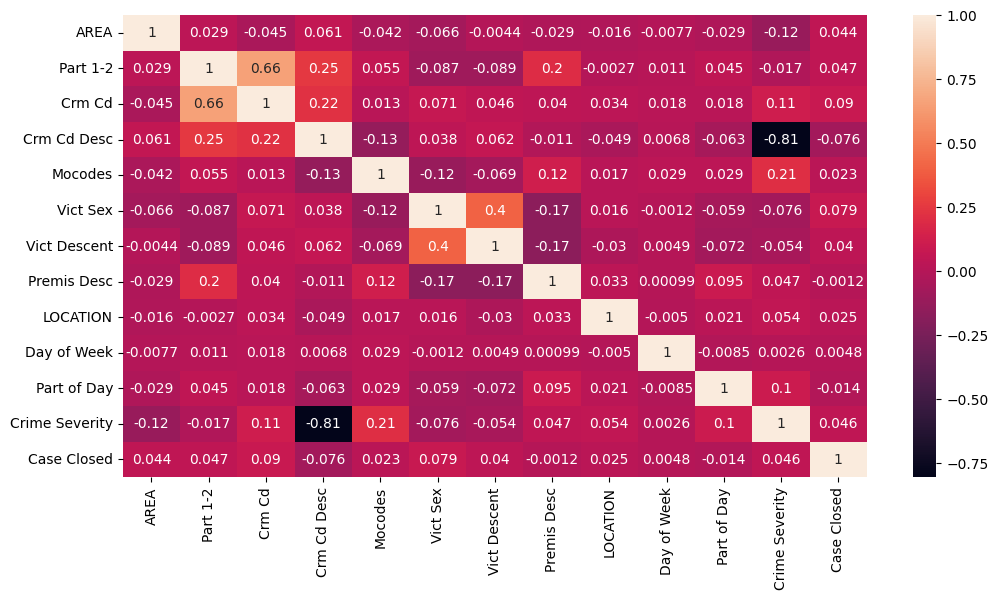

In [ ]:

plt.figure(figsize=(12,6))
sns.heatmap(correlation,annot=True)
plt.show()

In [ ]:
df['Case Closed'].value_counts()

Case Closed
0    13610
1      520
Name: count, dtype: int64